In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

## Data Import

In [75]:
df = pd.read_csv("house-prices.csv")
df.drop(columns=['Home'], inplace=True)

## Understand the data

In [76]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [77]:
df.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [58]:
df.shape

(128, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


In [20]:
df.isnull().sum()

Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [21]:
df.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,26868.770371,211.572431,0.725951,0.514492,1.069324
min,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [22]:
df.duplicated().sum()

np.int64(0)

### Pandas Profiling

# EDA

## Univariate EDA

Text(0.5, 1.0, 'Bedrooms')

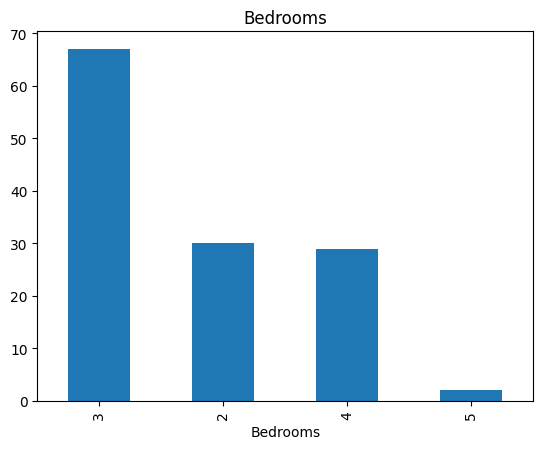

In [24]:
df['Bedrooms'].value_counts().plot(kind='bar')
plt.title('Bedrooms')

Text(0.5, 1.0, 'Bathrooms')

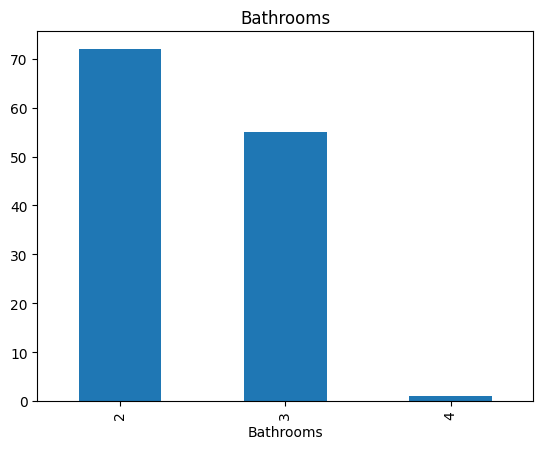

In [25]:
df['Bathrooms'].value_counts().plot(kind='bar')
plt.title('Bathrooms')

Text(0.5, 1.0, 'Offers')

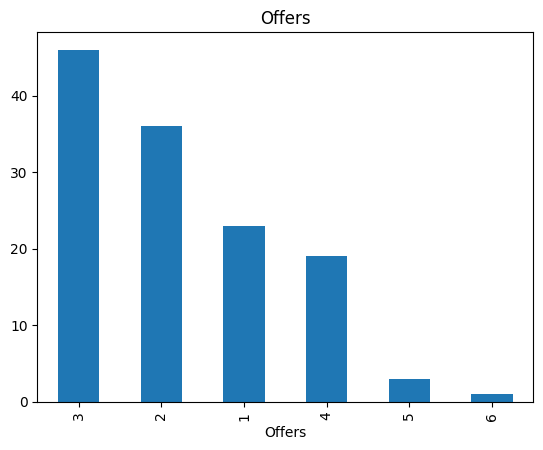

In [27]:
df['Offers'].value_counts().plot(kind='bar')
plt.title('Offers')

Text(0.5, 1.0, 'Neighborhood')

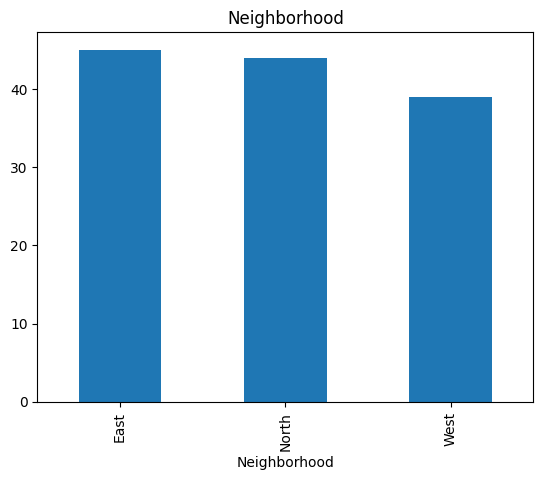

In [28]:
df['Neighborhood'].value_counts().plot(kind='bar')
plt.title('Neighborhood')

## Bivariate EDA

In [29]:
df.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

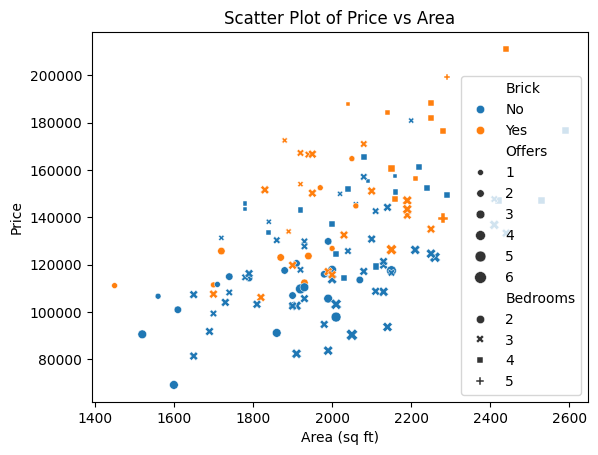

In [31]:
sns.scatterplot(
    x='SqFt', 
    y='Price', 
    hue='Brick', 
    size='Offers', 
    style='Bedrooms', 
    data=df
)

# Add labels and title for better visualization
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')
plt.show()

<Axes: xlabel='Bedrooms', ylabel='Neighborhood'>

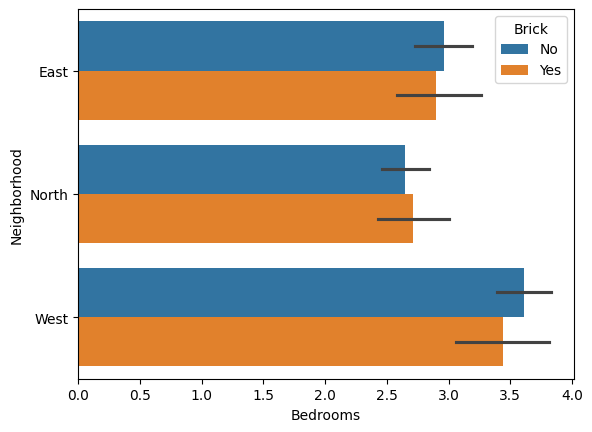

In [32]:
sns.barplot(x='Bedrooms',y='Neighborhood',hue ='Brick', data=df)

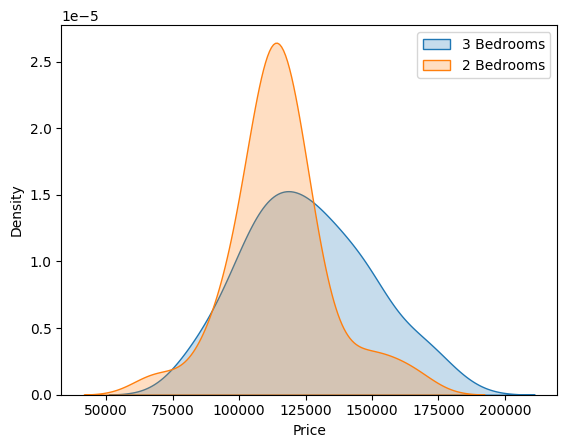

In [33]:
sns.kdeplot(df[df['Bedrooms'] == 3]['Price'],  fill=True, label="3 Bedrooms")
sns.kdeplot(df[df['Bedrooms'] == 2]['Price'], fill=True, label = "2 Bedrooms")
plt.legend()
plt.show()

In [34]:
pd.crosstab(df['Bathrooms'], df['Bedrooms'])

Bedrooms,2,3,4,5
Bathrooms,,,,
2,26,36,10,0
3,4,31,19,1
4,0,0,0,1


<Axes: xlabel='Bedrooms', ylabel='Bathrooms'>

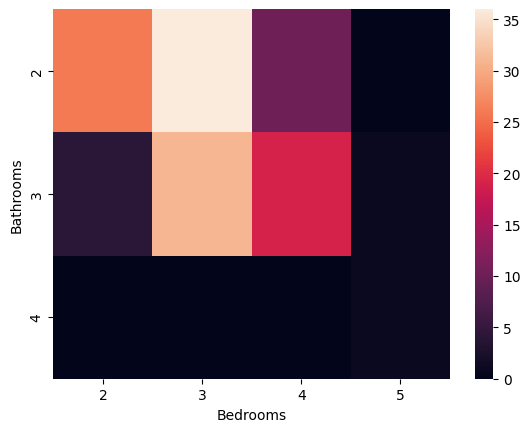

In [35]:
sns.heatmap(pd.crosstab(df['Bathrooms'], df['Bedrooms']))

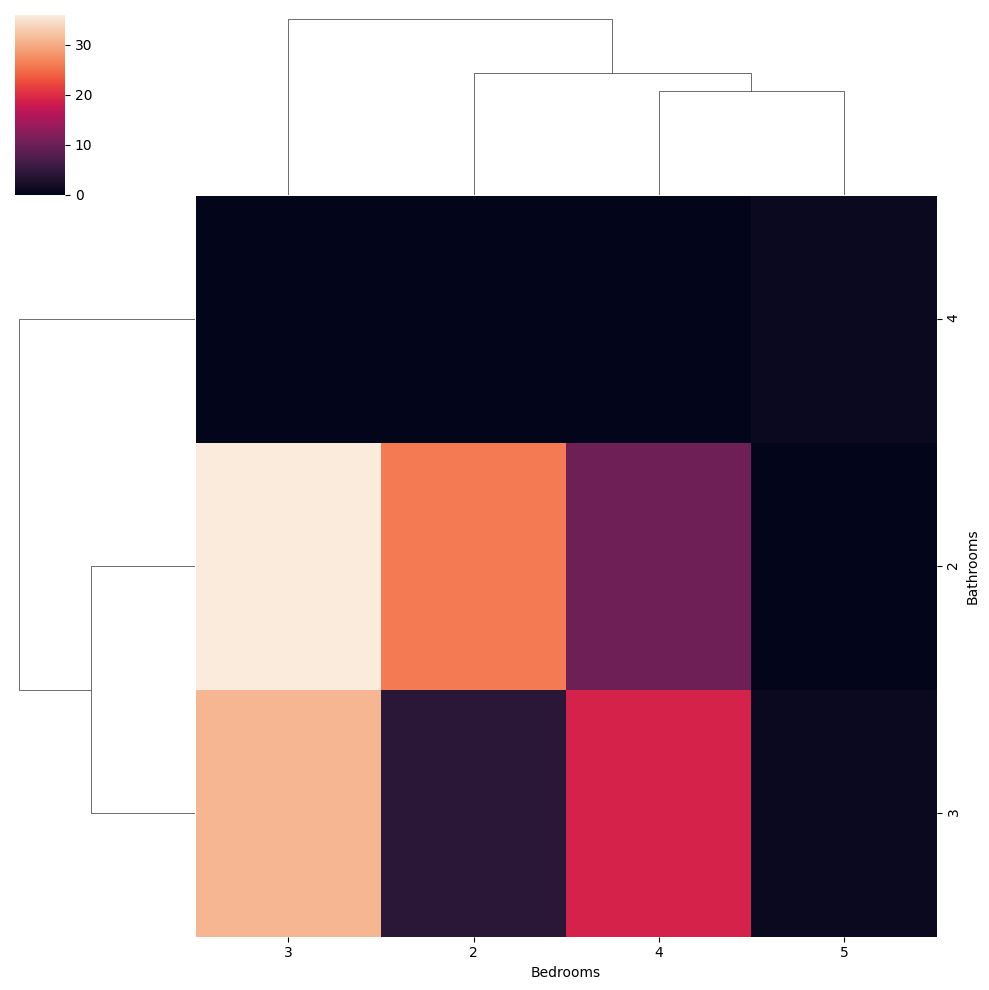

In [36]:
sns.clustermap(pd.crosstab(df['Bathrooms'], df['Bedrooms']))

<Axes: xlabel='SqFt', ylabel='Price'>

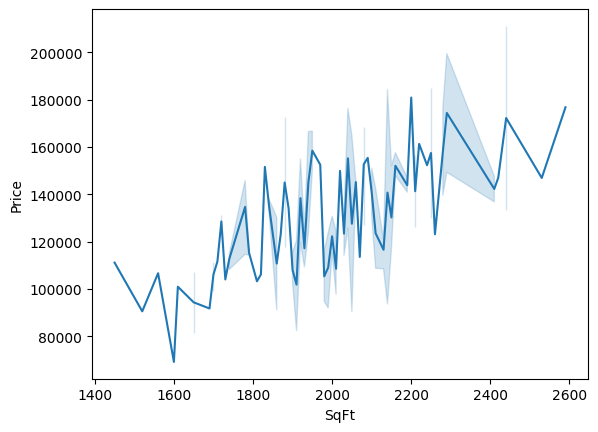

In [37]:
sns.lineplot(x='SqFt', y='Price', data=df)

## Encoding

In [59]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [60]:
df.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

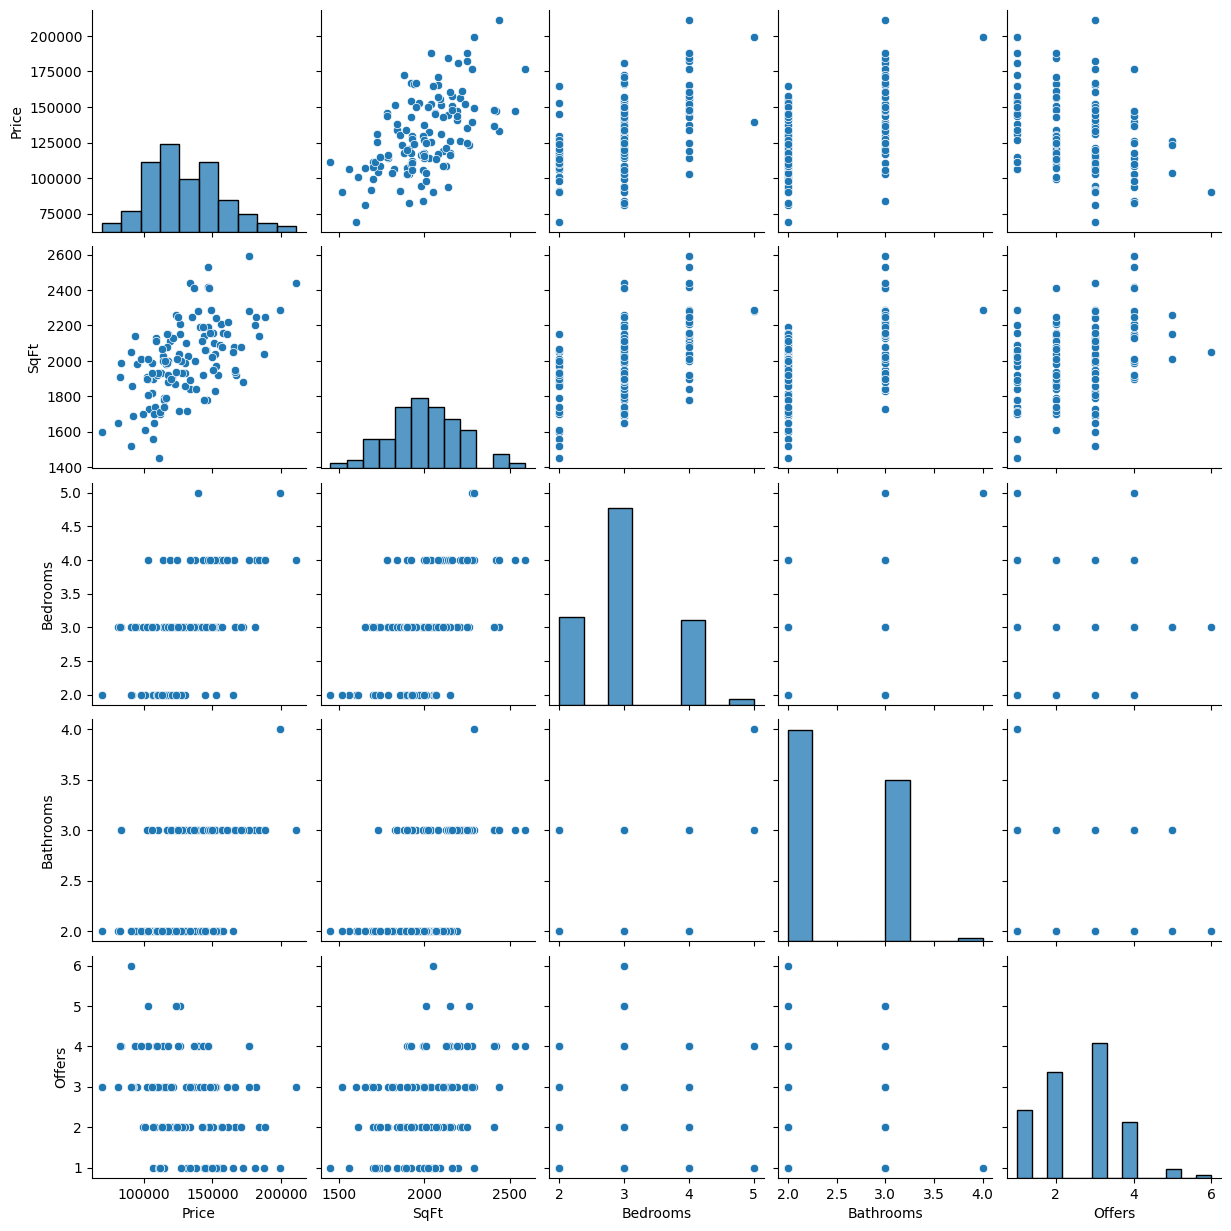

In [61]:
sns.pairplot(df)

In [63]:
# df.corr()

<Axes: xlabel='Price', ylabel='SqFt'>

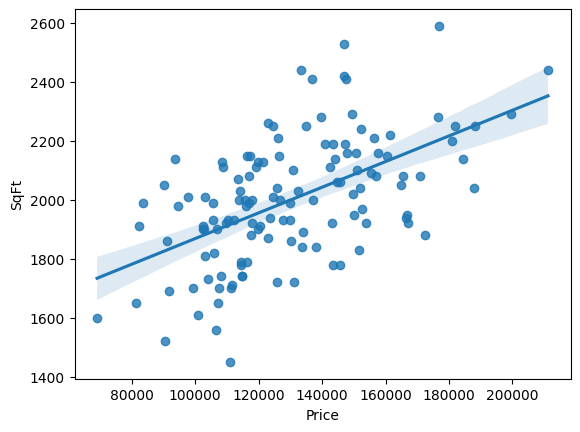

In [ ]:
# regplot : a scatter plot with a regression line fitted to the data
sns.regplot(x='Price', y='SqFt', data = df)

In [83]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price']), df['Price'], test_size=0.2, random_state=42)

In [85]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define categorical columns
categorical_columns = ['Brick', 'Neighborhood']

# Initialize OneHotEncoder with drop='first' to avoid multicollinearity
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Fit and transform X_train
X_train_encoded = ohe.fit_transform(X_train[categorical_columns])
X_test_encoded = ohe.transform(X_test[categorical_columns])

# Convert to DataFrame with proper column names
X_train_encoded_df = pd.DataFrame(X_train_encoded, 
                                  columns=ohe.get_feature_names_out(categorical_columns), 
                                  index=X_train.index)

X_test_encoded_df = pd.DataFrame(X_test_encoded, 
                                 columns=ohe.get_feature_names_out(categorical_columns), 
                                 index=X_test.index)

# Drop original categorical columns **without resetting the index**
X_train = X_train.drop(columns=categorical_columns)
X_test = X_test.drop(columns=categorical_columns)

# Concatenate encoded features with numerical features
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)


In [86]:
import pickle
pickle.dump(ohe,open('onehot_encoder.pkl','wb') )

In [87]:
X_test.shape

(26, 7)

In [88]:
X_train.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
70,1950,3,3,3,1.0,0.0,1.0
78,2130,3,2,3,0.0,1.0,0.0
47,2050,3,2,6,0.0,1.0,0.0
0,1790,2,2,2,0.0,0.0,0.0
12,1910,3,2,4,0.0,1.0,0.0


In [91]:
# df.corr()['Price']

## Outlier Handling

<Axes: ylabel='SqFt'>

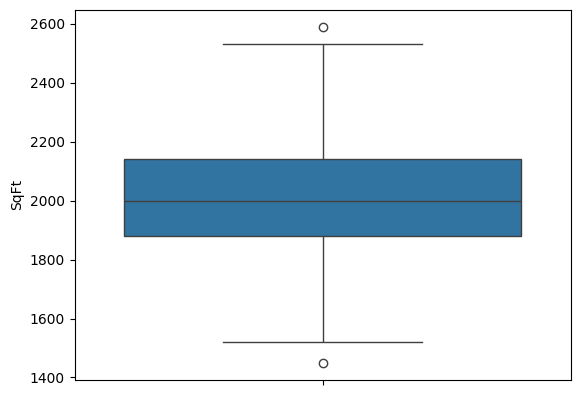

In [92]:
sns.boxplot(df['SqFt'])

<Axes: ylabel='Price'>

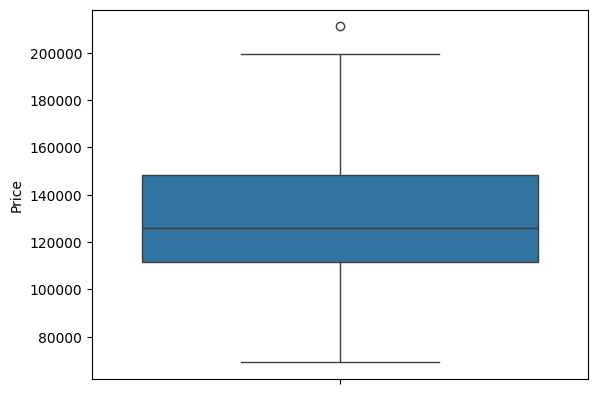

In [93]:
sns.boxplot(df['Price'])

In [94]:
X_train

,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
70,1950,3,3,3,1.0,0.0,1.0
78,2130,3,2,3,0.0,1.0,0.0
47,2050,3,2,6,0.0,1.0,0.0
0,1790,2,2,2,0.0,0.0,0.0
12,1910,3,2,4,0.0,1.0,0.0
...,...,...,...,...,...,...,...
106,2130,3,2,4,0.0,1.0,0.0
14,2590,4,3,4,0.0,0.0,1.0
92,2110,3,2,2,0.0,0.0,1.0
51,1860,2,2,3,0.0,1.0,0.0


In [95]:
# Finding the IQR
percentile25 = y_train.quantile(0.25)
percentile75 = y_train.quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 208512.5
Lower limit 51812.5


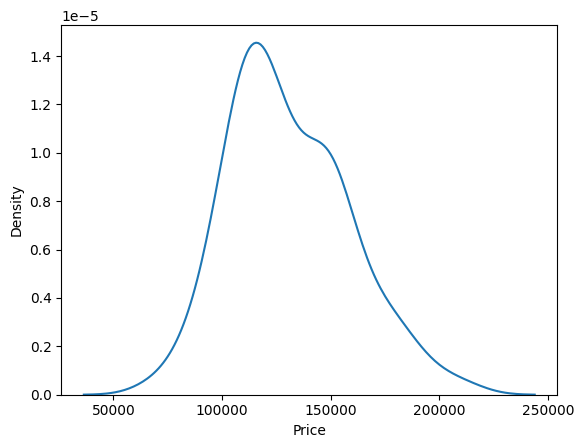

In [96]:
sns.kdeplot(x=y_train)
plt.show()

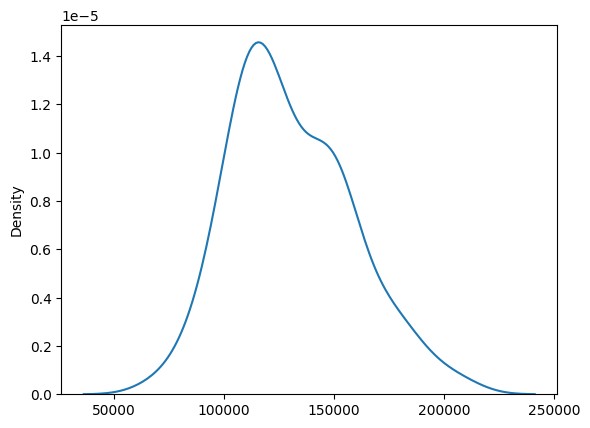

In [97]:


y_train = np.where(
    y_train > upper_limit,
    upper_limit,
    np.where(
        y_train < lower_limit,
        lower_limit,
        y_train
    )
)
sns.kdeplot(x=y_train)
plt.show()

In [98]:
# Finding the IQR
percentile25 = X_train['SqFt'].quantile(0.25)
percentile75 = X_train['SqFt'].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2518.75
Lower limit 1528.75


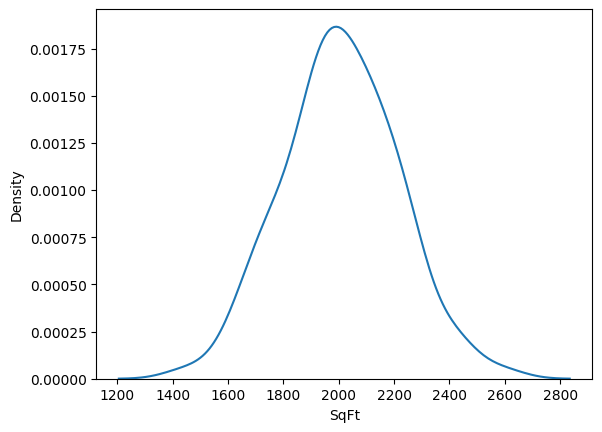

In [99]:
sns.kdeplot(x='SqFt', data=X_train)
plt.show()

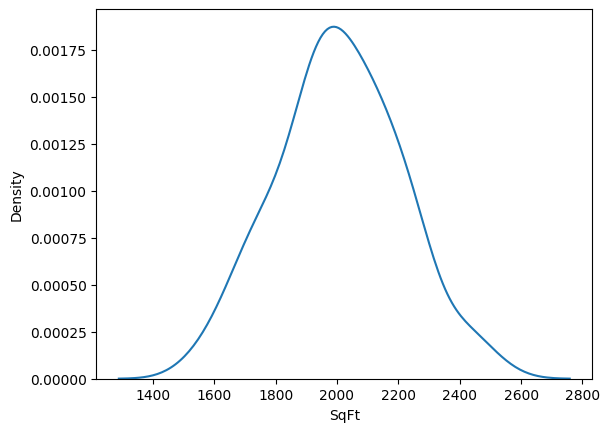

In [ ]:


X_train['SqFt'] = np.where(
    X_train['SqFt'] > upper_limit,
    upper_limit,
    np.where(
        X_train['SqFt'] < lower_limit,
        lower_limit,
        X_train['SqFt']
    )
)
sns.kdeplot(x='SqFt', data=X_train)
plt.show()

## Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
X_train

array([[-0.28187388, -0.08111071,  1.00142704,  0.36944587,  1.54919334,
        -0.77055175,  1.51338117],
       [ 0.59826294, -0.08111071, -0.92584764,  0.36944587, -0.64549722,
         1.29777137, -0.66077206],
       [ 0.20709102, -0.08111071, -0.92584764,  3.06112292, -0.64549722,
         1.29777137, -0.66077206],
       [-1.06421772, -1.45999279, -0.92584764, -0.52777981, -0.64549722,
        -0.77055175, -0.66077206],
       [-0.47745984, -0.08111071, -0.92584764,  1.26667155, -0.64549722,
         1.29777137, -0.66077206],
       [-0.08628792, -1.45999279, -0.92584764,  0.36944587, -0.64549722,
        -0.77055175, -0.66077206],
       [ 0.06040155, -0.08111071,  1.00142704, -1.4250055 , -0.64549722,
        -0.77055175,  1.51338117],
       [ 0.98943485,  1.29777137,  1.00142704, -0.52777981,  1.54919334,
        -0.77055175, -0.66077206],
       [ 0.15819453,  1.29777137,  1.00142704,  0.36944587, -0.64549722,
        -0.77055175, -0.66077206],
       [-1.30870017, -1.4599

In [102]:
import pickle
pickle.dump(scaler, open('scaling.pkl','wb'))

## Model trial

In [104]:
X_train

array([[-0.28187388, -0.08111071,  1.00142704,  0.36944587,  1.54919334,
        -0.77055175,  1.51338117],
       [ 0.59826294, -0.08111071, -0.92584764,  0.36944587, -0.64549722,
         1.29777137, -0.66077206],
       [ 0.20709102, -0.08111071, -0.92584764,  3.06112292, -0.64549722,
         1.29777137, -0.66077206],
       [-1.06421772, -1.45999279, -0.92584764, -0.52777981, -0.64549722,
        -0.77055175, -0.66077206],
       [-0.47745984, -0.08111071, -0.92584764,  1.26667155, -0.64549722,
         1.29777137, -0.66077206],
       [-0.08628792, -1.45999279, -0.92584764,  0.36944587, -0.64549722,
        -0.77055175, -0.66077206],
       [ 0.06040155, -0.08111071,  1.00142704, -1.4250055 , -0.64549722,
        -0.77055175,  1.51338117],
       [ 0.98943485,  1.29777137,  1.00142704, -0.52777981,  1.54919334,
        -0.77055175, -0.66077206],
       [ 0.15819453,  1.29777137,  1.00142704,  0.36944587, -0.64549722,
        -0.77055175, -0.66077206],
       [-1.30870017, -1.4599

In [105]:
y_train

array([166700. , 121300. ,  90300. , 114300. , 102600. , 105600. ,
       149900. , 156400. , 151900. , 114900. ,  97800. , 145800. ,
       176500. ,  91700. , 166500. , 111100. , 152500. , 182000. ,
       161300. , 105600. , 104000. , 139600. , 126200. , 149300. ,
       102500. ,  69100. , 126800. , 116500. , 130800. , 114600. ,
        93600. , 125700. , 108200. , 107500. , 117100. , 147100. ,
       144800. , 117800. , 188300. , 150700. , 154000. , 129800. ,
       123600. , 117000. , 119200. , 126300. , 157100. ,  94700. ,
        83600. , 131300. , 107300. , 103200. , 151600. , 147700. ,
       111600. , 109700. ,  81300. , 151100. , 117800. , 129800. ,
       119700. , 100900. , 147900. , 143600. , 123100. , 133600. ,
       138100. , 143100. , 115900. , 127700. , 108700. , 152300. ,
       106900. , 135000. , 110400. , 155400. , 120500. , 134000. ,
       147000. , 188000. , 124500. , 114200. , 117400. , 113800. ,
       114800. , 106100. , 208512.5, 171000. , 172500. , 19950

## Save Processed Data

In [106]:
import pickle

# Save the datasets
with open('train_test_data.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)


# Using ML PipeLine

In [107]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Define Features and Target
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target Variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Column Types
num_features = ["SqFt", "Bedrooms", "Bathrooms", "Offers"]
cat_features = ["Brick", "Neighborhood"]

# Define Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ("num_scaler", StandardScaler(), num_features),  # Scale numerical features
    ("cat_ohe", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_features)  # One-hot encode categorical
])

# Create Full Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

# Train the Model using Pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline (so we can load it later)
with open("house_price_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline Training Complete & Saved!")


Pipeline Training Complete & Saved!
